In [ ]:
import pandas as pd 

df = pd.read_csv('car data.csv')
df.head()

In [ ]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

In [ ]:
#Checking missing or null values
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [ ]:
final_dataset.head()

In [ ]:
final_dataset['Current_Year'] = 2020

In [ ]:
final_dataset.head()

In [ ]:
final_dataset['No. of Years'] = final_dataset['Current_Year'] - final_dataset['Year']

In [ ]:
final_dataset.head()

In [ ]:
final_dataset.drop(['Year'],axis=1,inplace = True)
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

In [ ]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

In [ ]:
final_dataset.corr()

In [ ]:
import seaborn as sns
sns.pairplot(final_dataset)

In [ ]:
import matplotlib.pyplot as plt
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plotting heatmap
heatmap = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [48]:
#Independent and Dependent Features
x_feature = final_dataset.iloc[:,1:]
y_feature = final_dataset.iloc[:,0]

In [50]:
x_feature.head()
y_feature.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [53]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_feature,y_feature)

ExtraTreesRegressor()

In [54]:
print(model.feature_importances_)

[0.35318685 0.04358744 0.00081409 0.07158017 0.23706383 0.01173254
 0.13365188 0.14838319]


<function matplotlib.pyplot.show(close=None, block=None)>

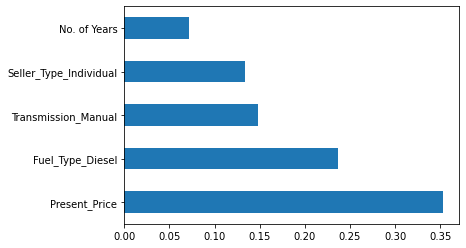

In [59]:
#plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_,index=x_feature.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show

In [60]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_feature,y_feature,test_size=0.2)

In [64]:
x_train.shape

(240, 8)

In [67]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf_random = RandomForestRegressor()


In [70]:
#Randomized Search CV

#Number of trees in random forest
#HyperParameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Maximum number of levels in tree
max_dept = [int(x) for x in np.linspace(5,30,num=6)]

# max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [71]:
#Create the random grid
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_dept,
                'min_samples_split':min_samples_split,
                'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [72]:
#Use the random grid to search for best hyperparameters
#First create the base model to tune
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, 
param_distributions=random_grid,
scoring='neg_mean_squared_error',
n_iter=10,
cv=5,
verbose=2,
random_state=42,
n_jobs=1)

In [73]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_sampl

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
predictions = rf_random.predict(x_test)
predictions

array([ 3.01343,  3.85335,  1.10022,  0.49939,  5.93686,  6.90456,
       19.9833 ,  8.43791,  0.9543 ,  8.93737,  7.254  ,  8.43791,
       21.23251,  3.44796,  7.44167,  0.58083,  0.56017,  5.29385,
       17.14677,  4.94475,  0.56402,  0.58956,  0.59211,  0.34445,
        2.92945,  0.35877,  9.89592,  5.27886,  2.74581,  8.79726,
        8.69695,  5.06811,  5.88365,  3.48771,  1.46036,  4.45645,
        4.45998,  8.81968,  0.60152,  6.90479,  2.8469 ,  0.60634,
        4.03452,  0.61617,  6.9763 ,  9.75863,  3.43823,  3.47882,
        3.23405,  3.60225,  0.75519,  5.01166,  4.8017 ,  0.25974,
        5.7117 , 20.82493,  0.4355 ,  0.95855,  5.19301,  8.40776,
        0.48897])

<AxesSubplot:xlabel='Selling_Price'>

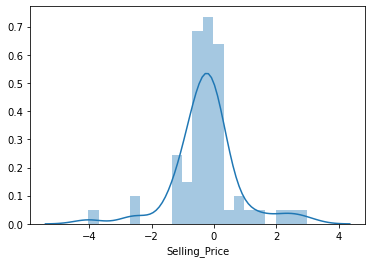

In [79]:
sns.distplot(y_test-predictions)

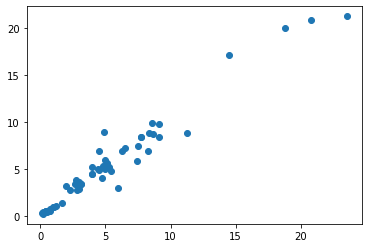

In [80]:
plt.scatter(y_test,predictions)

In [82]:
import pickle
#open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

#dump information to that file 
pickle.dump(rf_random,file)